<center><h1>Image Compression Using SVD</h1></center>

# 1. Introduction

Image compression is an essential technique in image processing that reduces the size of image files while preserving as much visual quality as possible. One powerful mathematical tool for image compression is **Singular Value Decomposition (SVD)**.

SVD is a matrix factorization method that decomposes a matrix into three other matrices, capturing the most important features of the original data. When applied to image data, which can be represented as matrices of pixel values, SVD allows us to approximate the image using only a few significant singular values. This results in a compressed version of the image with reduced storage requirements and minimal quality loss.


# 2. Understanding the SVD Algorithm

### What is SVD?

**Singular Value Decomposition (SVD)** is a fundamental matrix factorization technique in linear algebra. Given a real $m \times n$ matrix $A$, the SVD of $A$ is given by:

$$
A = U \Sigma V^T
$$

Where:

- $A$: Original matrix (e.g., an image matrix)
- $U$: An $m \times m$ orthogonal matrix
- $\Sigma$: An $m \times n$ diagonal matrix with non-negative real numbers on the diagonal (the **singular values**)
- $V^T$: The transpose of an $n \times n$ orthogonal matrix $V$

The singular values in $\Sigma$ are usually arranged in decreasing order: $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r \geq 0$, where $r$ is the rank of $A$.

### SVD for Image Compression

An image can be represented as a matrix of pixel intensities. For a grayscale image, it's a 2D matrix where each value corresponds to the brightness of a pixel.

SVD enables us to approximate the original image matrix using only the **top $k$** singular values and corresponding vectors:

$$
A_k = U_k \Sigma_k V_k^T
$$

Where:

- $U_k$: First $k$ columns of $U$
- $\Sigma_k$: Top $k \times k$ submatrix of $\Sigma$
- $V_k^T$: First $k$ rows of $V^T$

By choosing a small value of $k$, we can significantly reduce the amount of data needed to store the image while still preserving its main features. This is the core idea behind using SVD for **lossy image compression**.

### Benefits of SVD Compression

- **Data reduction**: We store only $k$ singular values and $k$ vectors from $U$ and $V$
- **Noise reduction**: Small singular values often represent noise and can be discarded
- **Control over quality**: You can choose $k$ to balance between image quality and compression ratio


# 3. About the Image

Grayscale images are stored on a computer as 2-dimensional arrays, while color images are stored as 3-dimensional arrays—one layer each for red, green, and blue arrays. Images are read in as integer arrays with entries between 0 and 255, but `plt.imshow()` works better if the image is an array of floats in the interval $[0,1]$. We scale the image properly by dividing the array by 255.

We will use the image *hubble_image.jpeg* taken by the Hubble telescope (downloaded from NASA website). Description of the image is (from NASA website https://www.nasa.gov/image-feature/goddard/2022/hubble-homes-in-on-a-celestial-fireworks-display):

*"Shreds of the colorful supernova remnant DEM L 190 seem to billow across the screen in this image from the NASA/ESA Hubble Space Telescope. The delicate sheets and intricate filaments are debris from the cataclysmic death of a massive star that once lived in the Large Magellanic Cloud, a small satellite galaxy of the Milky Way. DEM L 190 – also known as LMC N49 – is the brightest supernova remnant in the Large Magellanic Cloud and lies approximately 160,000 light-years away from Earth in the constellation Dorado."*


# 4. Steps of Image Compression Using SVD

### Step 1: Load and Normalize the Image

In this step, we load the color image `hubble_image.jpeg` using `matplotlib.pyplot.imread()`, which reads the image as a NumPy array. Since the image is in color, it is loaded as a 3-dimensional array representing the Red, Green, and Blue (RGB) channels.

The pixel values in the image are originally integers ranging from 0 to 255. To make the image compatible with `plt.imshow()` and simplify numerical processing, we normalize the pixel values to the range $[0, 1]$ by dividing the entire array by 255.

Finally, we check the shape of the loaded image array. For a color image, the shape will be of the form `(height, width, 3)`, where the third dimension corresponds to the RGB color channels.


In [1]:
from matplotlib import pyplot as plt
#Scale the RGB values to the interval (0,1)
image_color = plt.imread('hubble_image.jpeg')/255
# color images are 3D arrays
image_color.shape

(1830, 1896, 3)

### Step 2: Computing the Compact SVD and Analyzing Singular Values

To better understand the internal structure of an image, we compute the **compact Singular Value Decomposition (SVD)** of the image matrix. Following the algorithm discussed in the lecture, we apply this process to each of the three RGB channels of the image.

After computing the SVD, we plot the singular values on a logarithmic scale to visualize how quickly they decay. For clarity, we use the maximum singular values across the three channels.

We then verify the fundamental properties of SVD by reconstructing the matrix from its components ($\mathbf{A} = \mathbf{U} \Sigma \mathbf{V}^T$) and checking whether $\mathbf{U}$ and $\mathbf{V}$ are orthogonal matrices.

Finally, we compare our computed singular values with those obtained using the built-in `np.linalg.svd()` function from NumPy to evaluate the accuracy of our implementation.


Red layer - U is orthogonal: True
Red layer - V is orthogonal: True
Red layer - Singular Value Error: 3.970836523715198e-10


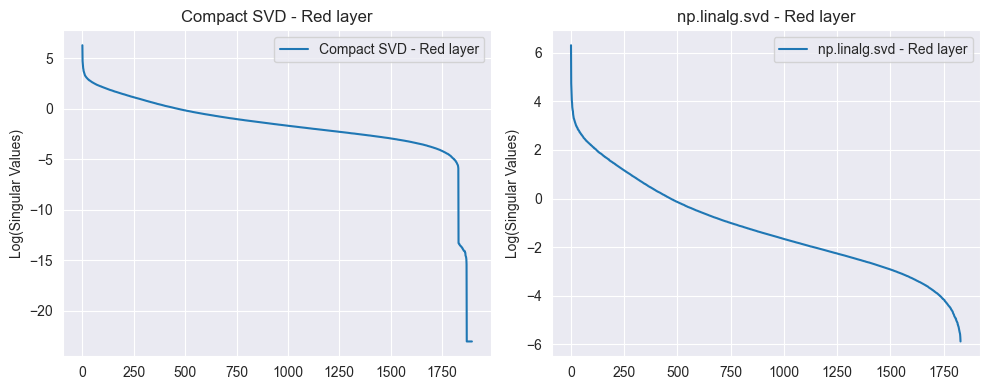

Green layer - U is orthogonal: True
Green layer - V is orthogonal: True
Green layer - Singular Value Error: 2.6478437554794805e-10


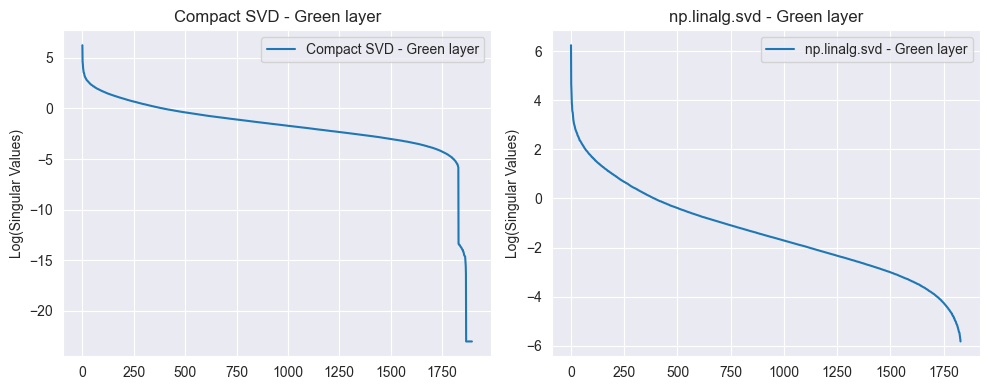

Blue layer - U is orthogonal: True
Blue layer - V is orthogonal: True
Blue layer - Singular Value Error: 2.332098239809989e-10


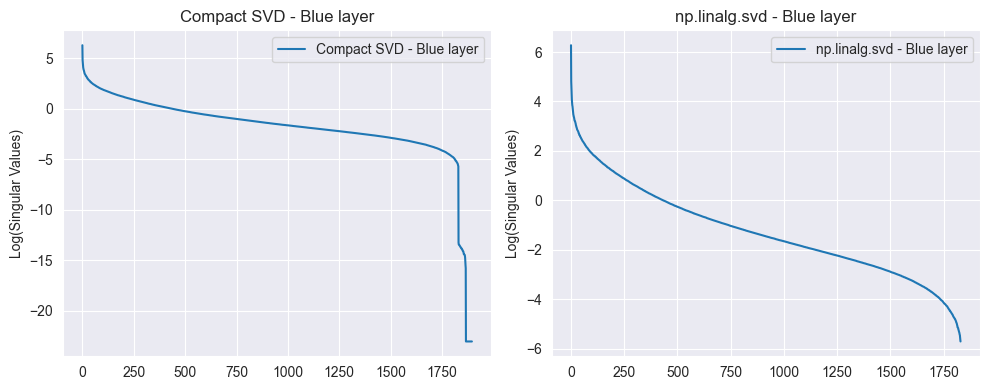

In [3]:
import numpy as np
# Define a function to compute compact SVD following the algorithm from class
def compact_svd(A):
    # Compute A^T A and A A^T
    AtA = A.T @ A
    AAt = A @ A.T

    # Compute eigenvalues and eigenvectors
    eigvals_v, V = np.linalg.eigh(AtA)  # For V
    eigvals_u, U = np.linalg.eigh(AAt)  # For U

    # Sort eigenvalues and eigenvectors in descending order
    idx_v = np.argsort(eigvals_v)[::-1]
    idx_u = np.argsort(eigvals_u)[::-1]
    V = V[:, idx_v]
    U = U[:, idx_u]

    # Compute singular values from square roots of eigenvalues
    singular_values = np.sqrt(np.maximum(eigvals_v[idx_v], 0))  # Ensure non-negative
    Sigma = np.diag(singular_values)  # Construct diagonal matrix of singular values

    return U, Sigma, V.T  # Return U, Sigma, and V transpose


# Helper function to plot singular values in log scale
def plot_singular_values(singular_values, title="Singular Values in Log Scale"):
    singular_values = np.maximum(singular_values, 1e-10)  # Avoid log(0)
    plt.plot(np.log(singular_values), label=title)
    plt.ylabel('Log(Singular Values)')
    plt.legend()
    plt.grid(True)

# Load and normalize image (pixel values in [0, 1])
image_color = plt.imread(r'hubble_image.jpeg') / 255.0

# Extract RGB layers from the color image
red_layer = image_color[:, :, 0]
green_layer = image_color[:, :, 1]
blue_layer = image_color[:, :, 2]

# Function to process and analyze one image layer (R, G, or B)
def process_layer(layer, layer_name="layer"):
    # Compute compact SVD
    U, Sigma, Vt = compact_svd(layer)

    # Check orthogonality of U and V
    orthogonality_U = np.allclose(U.T @ U, np.eye(U.shape[1]), rtol=1e-5)
    orthogonality_V = np.allclose(Vt.T @ Vt, np.eye(Vt.shape[0]))

    # Compare with NumPy's built-in SVD
    U_np, Sigma_np, Vt_np = np.linalg.svd(layer, full_matrices=False)

    # Compute error in singular values
    min_length = min(len(np.diag(Sigma)), len(Sigma_np))
    singular_value_error = np.linalg.norm(np.diag(Sigma)[:min_length] - Sigma_np[:min_length])

    # Print verification results
    print(f"{layer_name} - U is orthogonal:", orthogonality_U)
    print(f"{layer_name} - V is orthogonal:", orthogonality_V)
    print(f"{layer_name} - Singular Value Error:", singular_value_error)

    # Plot singular values from custom and NumPy's SVD
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plot_singular_values(np.diag(Sigma), f"Compact SVD - {layer_name}")
    plt.title(f"Compact SVD - {layer_name}")

    plt.subplot(1, 2, 2)
    plot_singular_values(Sigma_np, f"np.linalg.svd - {layer_name}")
    plt.title(f"np.linalg.svd - {layer_name}")

    plt.tight_layout()
    plt.show()

    return  # No return needed unless we reconstruct the image layer

# Apply the process to each color layer
red_reconstructed = process_layer(red_layer, "Red layer")
green_reconstructed = process_layer(green_layer, "Green layer")
blue_reconstructed = process_layer(blue_layer, "Blue layer")


### Step 3: Image Compression Using Low-Rank Approximation

For the image compression task, we will apply Singular Value Decomposition (SVD) to each of the RGB color channels of the image separately. To achieve this, we decompose the red, green, and blue layers of the image into their corresponding low-rank approximations.

We start by considering each color layer as a matrix: $\mathbf{R}$ for the red channel, $\mathbf{G}$ for the green channel, and $\mathbf{B}$ for the blue channel. After applying SVD to each of these matrices, we can generate low-rank approximations $\mathbf{R}_k$, $\mathbf{G}_k$, and $\mathbf{B}_k$ by retaining only the top $k$ singular values for each matrix. This allows us to control the compression by adjusting $k$, the number of singular values we keep.

Once the low-rank approximations are calculated for each color channel, we can recombine them into a new 3-dimensional array using `np.dstack()`, which stacks the layers back together, preserving the structure of the original image. This approach helps to achieve the desired compression.

The compression factor $C_f$ is defined as the ratio between the number of singular values $n$ in the original matrix and the number of singular values $k$ retained for the compression, i.e.,

$$ C_f = \frac{n}{k} $$

To test the compression, we will write a function that computes the compressed image given a compression factor. We will experiment with different compression factors, such as 360, 90, 20, and 10. After compressing the image, we will visualize the results by plotting both the original and compressed images in separate subplots. Additionally, we will display the difference in the number of entries required to store the original image and the compressed version in the figure title using `plt.suptitle()`.


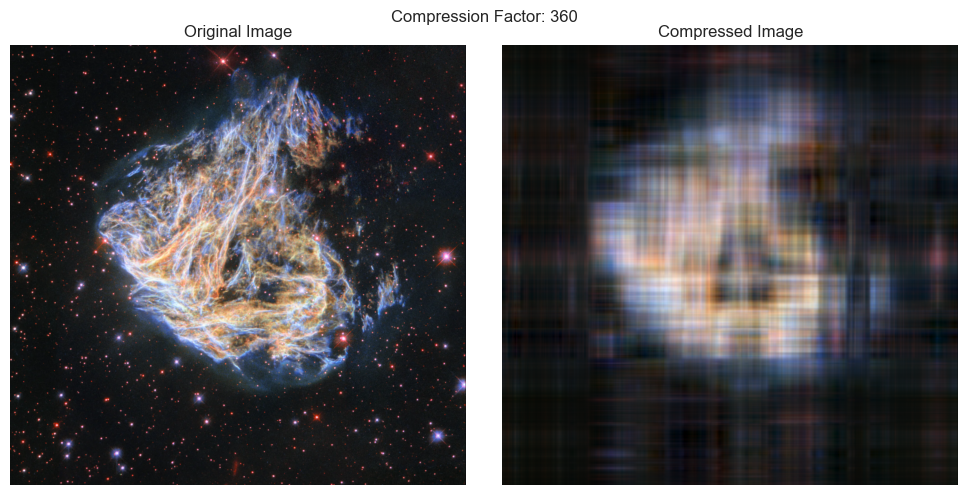

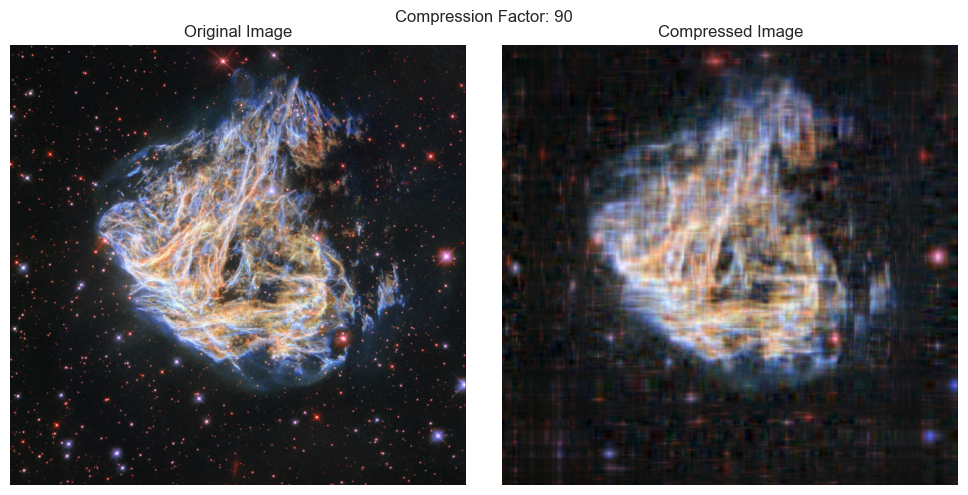

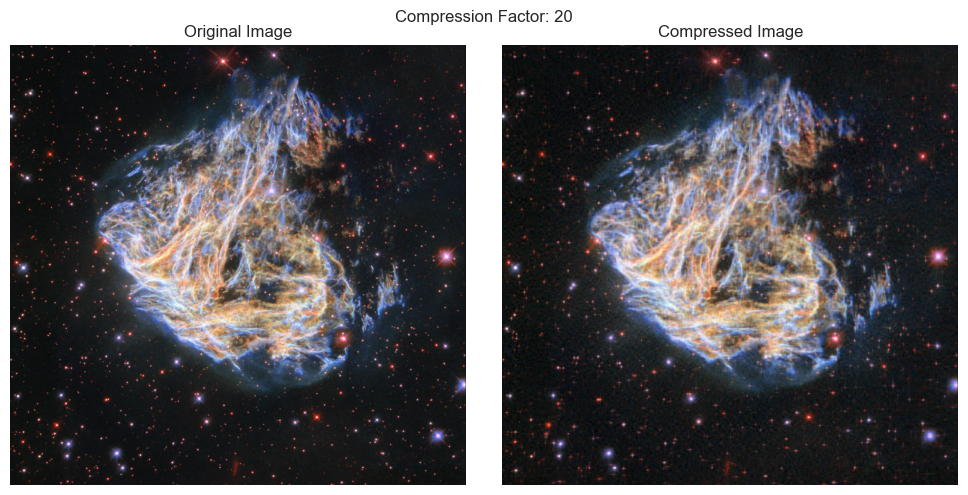

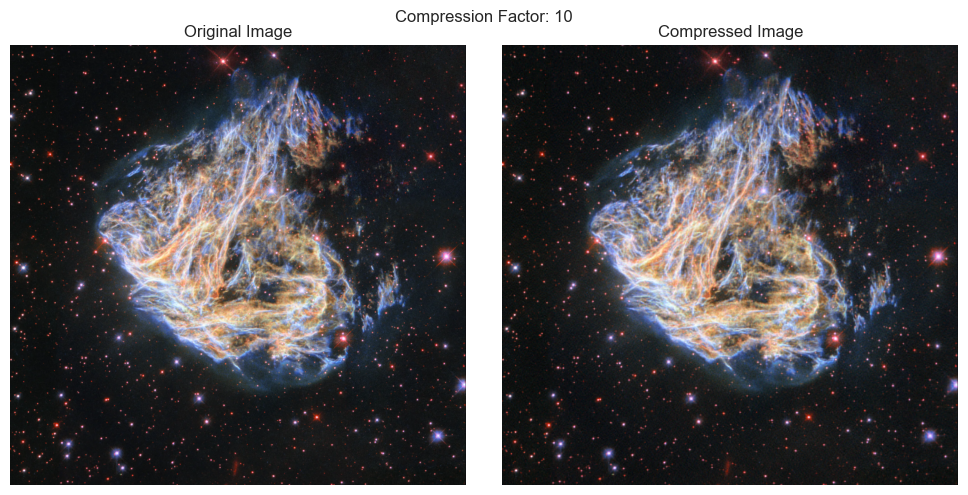

In [4]:
# Function to compress a single matrix (image layer) using SVD
def compress_image(A, compression_factor):
    # Perform SVD on the input matrix A
    U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

    n = len(Sigma)  # Total number of singular values
    k = max(1, n // compression_factor)  # Determine number of singular values to keep

    # Keep only the first k singular values and corresponding vectors
    U_compressed = U[:, :k]
    Sigma_compressed = np.diag(Sigma[:k])
    Vt_compressed = Vt[:k, :]

    # Reconstruct the matrix with the compressed components
    A_compressed = U_compressed @ Sigma_compressed @ Vt_compressed

    # Ensure the values are in the valid range [0, 1]
    A_compressed = np.clip(A_compressed, 0, 1)

    return A_compressed

# Function to compress the color image by compressing each color layer (R, G, B) separately
def compress_color_image(image, compression_factor):
    # Extract red, green, and blue layers from the color image
    red_layer = image[:, :, 0]
    green_layer = image[:, :, 1]
    blue_layer = image[:, :, 2]

    # Compress each layer using the compress_image function
    red_compressed = compress_image(red_layer, compression_factor)
    green_compressed = compress_image(green_layer, compression_factor)
    blue_compressed = compress_image(blue_layer, compression_factor)

    # Stack the compressed layers back into a single 3D array (compressed color image)
    compressed_image = np.stack([red_compressed, green_compressed, blue_compressed], axis=2)

    # Ensure the compressed image values are in the valid range [0, 1]
    compressed_image = np.clip(compressed_image, 0, 1)

    return compressed_image

# Function to display the original and compressed images side by side, and show the compression details
def display_images(original, compressed, compression_factor):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    # Plot the compressed image
    plt.subplot(1, 2, 2)
    plt.imshow(compressed)
    plt.title('Compressed Image')
    plt.axis('off')

    # Show the compression factor as the figure title
    plt.suptitle(f'Compression Factor: {compression_factor}')
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Function to test image compression with different compression factors
def test_compression(image, compression_factors):
    for cf in compression_factors:
        # Compress the image with the given compression factor
        compressed_image = compress_color_image(image, cf)
        # Display the original and compressed images with compression details
        display_images(image, compressed_image, cf)

# Load the image, normalize pixel values to the range [0, 1]
image = plt.imread(r'hubble_image.jpeg') / 255.0

# Define the compression factors to test
compression_factors = [360, 90, 20, 10]

# Run the compression test for the specified compression factors
test_compression(image, compression_factors)

### Step 4: Image Compression Using Singular Value Thresholding

To compute the lowest rank approximation of a matrix $\mathbf{A}$ with a 2-norm error and Frobenius norm error less than a specified tolerance $\epsilon$, we can proceed by performing the Singular Value Decomposition (SVD) of the matrix $\mathbf{A}$ and selecting the number of singular values that ensures the errors stay within the given bounds.

Here’s how the process works:

1. **Compute the SVD of $\mathbf{A}$**:
   First, we perform the SVD of the matrix $\mathbf{A}$ to obtain the matrices $\mathbf{U}$, $\Sigma$, and $\mathbf{V}^T$. These matrices represent the decomposition of the original matrix, where $\Sigma$ contains the singular values of $\mathbf{A}$, ordered in decreasing order.

2. **Determine the truncation point**:
   We need to find the smallest number of singular values to keep such that the error in both the 2-norm and Frobenius norm are less than or equal to the specified tolerance $\epsilon$. The 2-norm error can be approximated by the sum of the squares of the discarded singular values, and the Frobenius norm error is the same. To ensure that both errors meet the tolerance condition, we will look for the smallest $k$ such that:
   $$
   \sum_{i=k+1}^{n} \sigma_i^2 \leq \epsilon^2
   $$
   where $\sigma_i$ are the singular values of $\mathbf{A}$, and $n$ is the total number of singular values. This sum corresponds to the squared Frobenius norm of the difference between the original matrix and its rank-$k$ approximation.

3. **Compute the truncated SVD**:
   Once we have determined the appropriate rank $k$, we can construct the truncated SVD, which includes only the first $k$ singular values and the corresponding singular vectors. This gives us the rank-$k$ approximation of the matrix.

4. **Return the number of entries needed**:
   Finally, we compute the number of entries needed to store the rank-$k$ approximation. This is given by the number of elements in the matrices $\mathbf{U}$, $\Sigma$, and $\mathbf{V}^T$ used to form the approximation:
   $$
   \text{entries} = m \cdot k + k + k \cdot n
   $$
   where $m$ and $n$ are the dimensions of the matrix $\mathbf{A}$.

5. **Testing with different values of $\epsilon$**:
   To test the function, we can apply it to the matrix representing the image and use $\epsilon = 0.1$ and $\epsilon = 0.01$ as examples. We will then visualize the original and the rank-$k$ approximations side by side, displaying the difference in the number of entries required to store the original and approximated images.

When $\epsilon$ is smaller than or equal to the smallest singular value of $\mathbf{A}$, the truncation might lead to an approximation with fewer or even no singular values retained. In this case, the approximation may not capture much of the original information, leading to a poor reconstruction of the matrix.


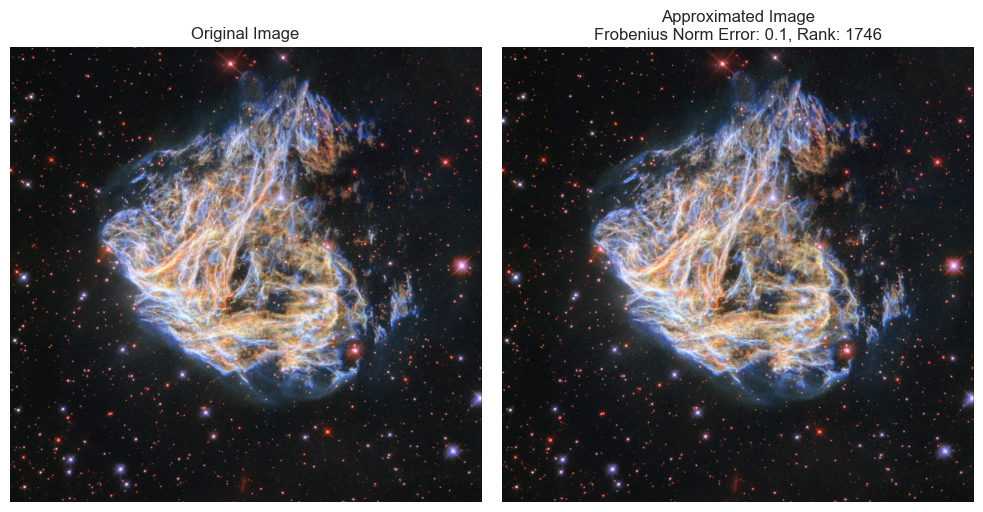

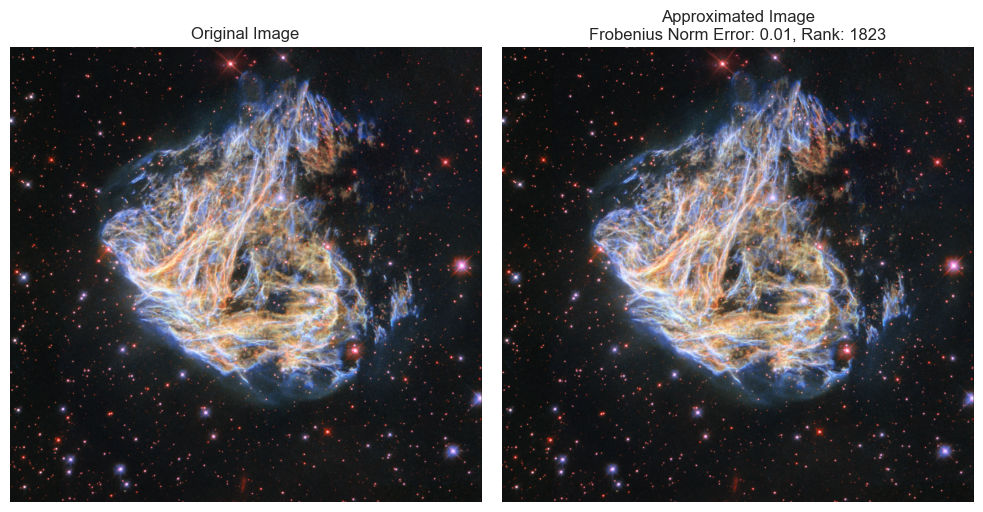

In [5]:
# Function to compress the image using Frobenius norm error and tolerance
def compress_image_with_Frobenius_Norm(A, tol):
    # Perform Singular Value Decomposition (SVD) on the input matrix A
    U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

    # Calculate squared singular values
    S = np.multiply(Sigma, Sigma)
    k = np.shape(S)[0]

    # Initialize an array to store cumulative sum of squared singular values
    sum1 = np.zeros(k)
    sum1[-1] = S[-1]

    # Calculate the cumulative sum of squared singular values from the smallest to largest
    for i in range(2, k+1):
        sum1[-i] = sum1[-i+1] + S[-i]

    # Calculate the square root of the cumulative sum and subtract tolerance
    sum1 = np.sqrt(sum1) - tol
    sum1[sum1 < 0] = 0  # Ensure no negative values

    # Determine the rank by finding the smallest index where cumulative sum is less than tolerance
    rank = np.argmin(sum1) - 1

    # Construct the low-rank approximation of the matrix
    U_compressed = U[:, :rank]
    Sigma_compressed = np.diag(Sigma[:rank])
    Vt_compressed = Vt[:rank, :]

    # Reconstruct the approximated matrix using the truncated SVD
    A_approx = U_compressed @ Sigma_compressed @ Vt_compressed

    return A_approx, rank

# Function to display the original and compressed images for comparison
def display_image_comparison(original, approx, tol, rank):
    # Create subplots to display the original and approximated images side by side
    plt.figure(figsize=(10, 5))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot the approximated image
    plt.subplot(1, 2, 2)
    plt.imshow(np.clip(approx, 0, 1), cmap='gray')  # Clip values to [0, 1] to ensure valid pixel range
    plt.title(f'Approximated Image\nFrobenius Norm Error: {tol}, Rank: {rank}')
    plt.axis('off')

    # Adjust layout to make the plot neat
    plt.tight_layout()
    plt.show()

# Function to test compression with different tolerances
def test_compression_on_image(image, tols):
    # Loop through each tolerance level
    for tol in tols:
        compressed_layers = []
        # Compress each color channel (Red, Green, Blue)
        for i in range(3):
            A_approx, rank = compress_image_with_Frobenius_Norm(image[:, :, i], tol)
            compressed_layers.append(A_approx)

        # Stack the compressed layers back into a single image
        compressed_image = np.stack(compressed_layers, axis=-1)

        # Display the original and compressed images
        display_image_comparison(image, compressed_image, tol, rank)

# Load the image and scale it to the range [0, 1]
image = plt.imread('hubble_image.jpeg') / 255

# Define the error tolerances to test
tols = [0.1, 0.01]
# Run the compression test
test_compression_on_image(image, tols)

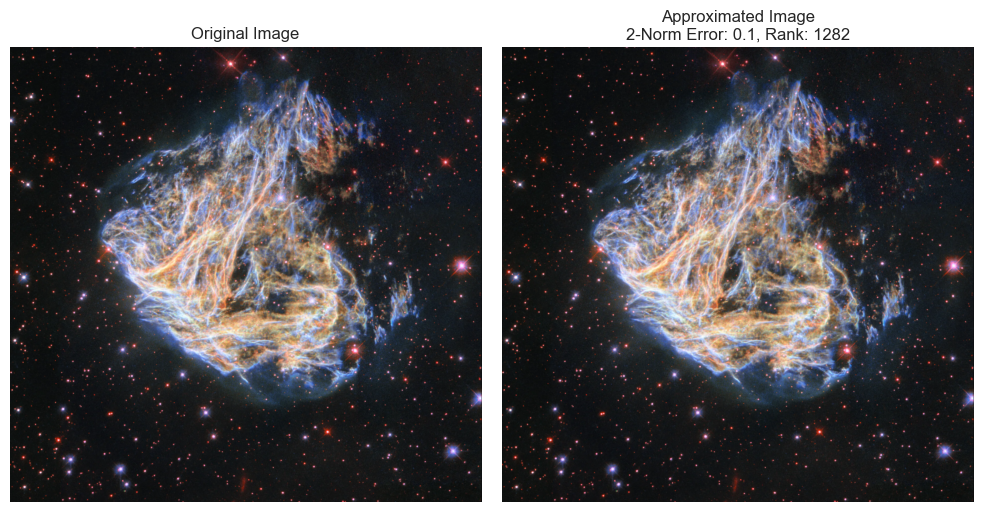

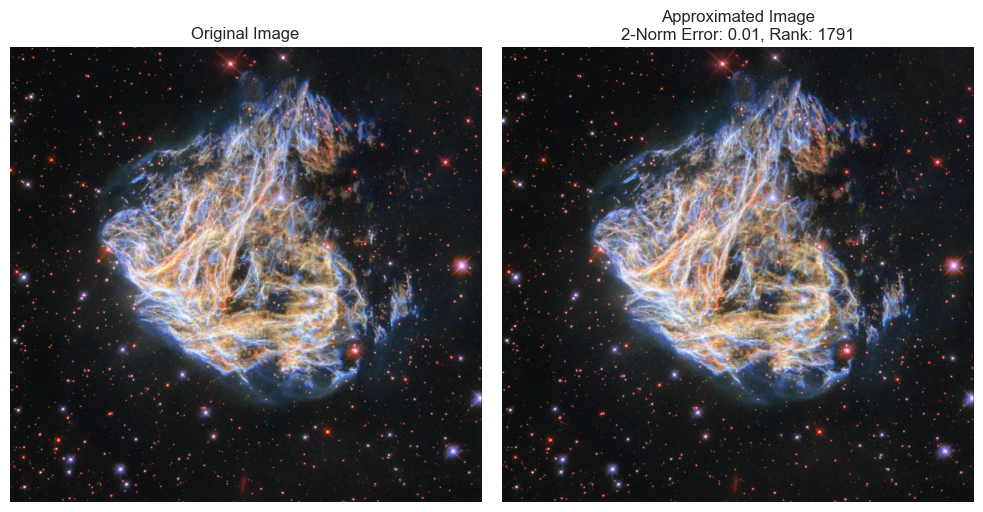

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compress the image using 2-norm error and tolerance
def compress_image_with_2norm(A, tol):
    # Perform Singular Value Decomposition (SVD) on the input matrix A
    U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

    # Initialize rank as 0
    r = 0

    # Loop through each singular value and count how many are greater than the tolerance
    for value in Sigma:
        if np.abs(value) > tol:
            r += 1

    # Set the rank to the count of singular values greater than the tolerance
    rank = r

    # Construct the low-rank approximation of the matrix
    U_compressed = U[:, :rank]
    Sigma_compressed = np.diag(Sigma[:rank])
    Vt_compressed = Vt[:rank, :]

    # Reconstruct the approximated matrix using the truncated SVD
    A_approx = U_compressed @ Sigma_compressed @ Vt_compressed

    return A_approx, rank

# Function to display the original and compressed images for comparison
def display_image_comparison(original, approx, tol, rank):
    # Create subplots to display the original and approximated images side by side
    plt.figure(figsize=(10, 5))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot the approximated image
    plt.subplot(1, 2, 2)
    plt.imshow(np.clip(approx, 0, 1), cmap='gray')  # Clip values to [0, 1] to ensure valid pixel range
    plt.title(f'Approximated Image\n2-Norm Error: {tol}, Rank: {rank}')
    plt.axis('off')

    # Adjust layout to make the plot neat
    plt.tight_layout()
    plt.show()

# Function to test compression with different tolerances
def test_compression_on_image(image, tols):
    # Loop through each tolerance level
    for tol in tols:
        compressed_layers = []
        # Compress each color channel (Red, Green, Blue)
        for i in range(3):
            A_approx, rank = compress_image_with_2norm(image[:, :, i], tol)
            compressed_layers.append(A_approx)

        # Stack the compressed layers back into a single image
        compressed_image = np.stack(compressed_layers, axis=-1)

        # Clip the compressed image values to be within the valid range [0, 1]
        compressed_image = np.clip(compressed_image, 0, 1)

        # Display the original and compressed images
        display_image_comparison(image, compressed_image, tol, rank)

# Load the image and scale it to the range [0, 1]
image = plt.imread('hubble_image.jpeg') / 255

# Define the error tolerances to test
tols = [0.1, 0.01]
# Run the compression test
test_compression_on_image(image, tols)
